In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_data_path = 'assets/train'
test_data_path = 'assets/test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')

In [4]:
resnet.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [5]:
for layer in resnet.layers:
  layer.trainable = False

In [6]:
folders = glob('assets/train/*')
print(folders)

['assets/train/lamborghini', 'assets/train/audi', 'assets/train/mercedes']


In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = training_gen.flow_from_directory('assets/train', class_mode='categorical', target_size=(224, 224), batch_size=32)

test_set = test_gen.flow_from_directory('assets/test', class_mode='categorical', target_size=(224, 224), batch_size=32)

Found 117 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [13]:
result = model.fit_generator(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
4/4 [==============================] - 7s 2s/step - loss: 7.1623 - accuracy: 0.3077 - val_loss: 10.8804 - val_accuracy: 0.3455
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 11.0855 - accuracy: 0.2991 - val_loss: 6.3681 - val_accuracy: 0.4364
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 4.4568 - accuracy: 0.3675 - val_loss: 4.9716 - val_accuracy: 0.3091
Epoch 4/50
4/4 [==============================] - 6s 1s/step - loss: 4.4300 - accuracy: 0.3761 - val_loss: 3.7121 - val_accuracy: 0.3455
Epoch 5/50
4/4 [==============================] - 6s 1s/step - loss: 2.4060 - accuracy: 0.3761 - val_loss: 2.6466 - val_accuracy: 0.3455
Epoch 6/50
4/4 [==============================] - 6s 1s/step - loss: 2.0586 - accuracy: 0.4274 - val_loss: 2.1077 - val_accuracy: 0.4364
Epoch 7/50
4/4 [==============================] - 6s 1s/step - loss: 2.0209 - accuracy: 0.4188 - val

In [14]:
result.history

{'loss': [7.1622514724731445,
  11.085500717163086,
  4.456752300262451,
  4.4299635887146,
  2.4059910774230957,
  2.0586097240448,
  2.020855188369751,
  1.6401927471160889,
  1.2849990129470825,
  1.0667307376861572,
  0.9092532396316528,
  0.7025180459022522,
  0.7966218590736389,
  1.0552046298980713,
  1.0001450777053833,
  0.9204564094543457,
  0.6480968594551086,
  0.6555454730987549,
  0.6114367842674255,
  0.5489710569381714,
  0.6051747798919678,
  0.6446309685707092,
  0.5744942426681519,
  0.5412734150886536,
  0.4701489210128784,
  0.494132936000824,
  0.47478196024894714,
  0.46431589126586914,
  0.4625394344329834,
  0.55326908826828,
  0.5024107694625854,
  0.43635478615760803,
  0.4774382412433624,
  0.449221134185791,
  0.45637407898902893,
  0.43316370248794556,
  0.44537875056266785,
  0.375698059797287,
  0.44692835211753845,
  0.469056099653244,
  0.532010555267334,
  0.644315779209137,
  0.7673994898796082,
  0.6457163095474243,
  0.5054724216461182,
  0.5637525

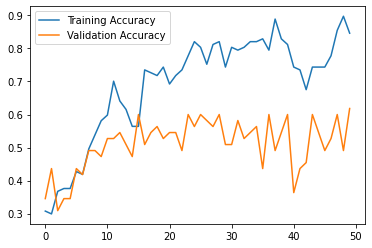

In [15]:
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

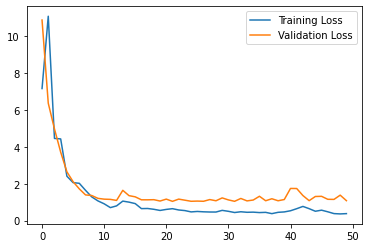

In [16]:
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

model.save('dynamic/model_resnet50.h5')

In [18]:
predictions = model.predict(test_set)

print(predictions)

[[3.40215385e-01 4.54828471e-01 2.04956129e-01]
 [3.19017887e-01 6.98530152e-02 6.11129165e-01]
 [7.16589510e-01 2.81869859e-01 1.54058845e-03]
 [7.86783919e-02 1.54517442e-01 7.66804159e-01]
 [4.26464975e-02 9.02129471e-01 5.52239828e-02]
 [4.34216857e-01 5.56117773e-01 9.66546312e-03]
 [8.24177563e-02 3.08957309e-01 6.08624935e-01]
 [9.90394771e-01 1.67486200e-03 7.93033186e-03]
 [5.00317454e-01 2.82262206e-01 2.17420235e-01]
 [2.15918094e-01 6.63194060e-01 1.20887928e-01]
 [1.97306182e-03 5.99089563e-01 3.98937374e-01]
 [7.33673275e-02 8.93894672e-01 3.27379555e-02]
 [7.32163608e-01 1.53691873e-01 1.14144474e-01]
 [2.79226631e-04 8.42385367e-03 9.91296887e-01]
 [6.44370139e-01 2.04006359e-01 1.51623517e-01]
 [1.57183349e-01 4.22822148e-01 4.19994503e-01]
 [8.93833816e-01 7.63401091e-02 2.98261289e-02]
 [5.57566106e-01 4.15193260e-01 2.72406843e-02]
 [2.12888747e-01 6.29626930e-01 1.57484367e-01]
 [2.85957344e-02 1.78798754e-02 9.53524411e-01]
 [7.46675655e-02 8.20979357e-01 1.043530

In [19]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred)

[1 2 0 2 1 1 2 0 0 1 1 1 0 2 0 1 0 0 1 2 1 1 1 0 2 2 2 2 2 2 1 1 2 2 0 0 1
 2 1 1 0 2 1 1 1 1 2 0 1 2 1 0 2 0 0]


In [31]:
### EXAMPLE

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('dynamic/model_resnet50.h5')

In [33]:
# img = image.load_img('assets/train/audi/76.jpeg', target_size=(224, 224))
# img.show()

In [34]:
for i in range(8, 26):
    img = image.load_img('assets/train/mercedes/{}.jpg'.format(i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = x/255
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    prediction = model.predict(img_data)
    ans = np.argmax(prediction, axis=1)
    print('{} : '.format(i), end = "")
    if ans == 0:
        print("Audi")
    elif ans == 1:
        print("Lamborghini")
    elif ans == 2:
        print("Mercedes")

8 : Lamborghini
9 : Lamborghini
10 : Mercedes
11 : Mercedes
12 : Mercedes
13 : Mercedes
14 : Mercedes
15 : Mercedes
16 : Lamborghini
17 : Mercedes
18 : Mercedes
19 : Lamborghini
20 : Lamborghini
21 : Mercedes
22 : Lamborghini
23 : Mercedes
24 : Mercedes
25 : Mercedes


In [35]:
x = image.img_to_array(img)

In [36]:
x.shape

(224, 224, 3)

In [37]:
x = x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
prediction = model.predict(img_data)
prediction

array([[0.03248361, 0.44725055, 0.5202659 ]], dtype=float32)

In [40]:
ans = np.argmax(prediction, axis=1)

In [41]:
if ans == 0:
    print("Audi")
elif ans == 1:
    print("Lamborghini")
elif ans == 2:
    print("Mercedes")

Mercedes
